In [1]:
!pip install opencv-python

In [38]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [39]:
train = pd.read_csv('C:/DS/Netology/CV/train.csv')
test = pd.read_csv('C:/DS/Netology/CV/test.csv')

In [6]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [7]:
train_img.shape

(42000, 28, 28)

Визуализируем исходные данные

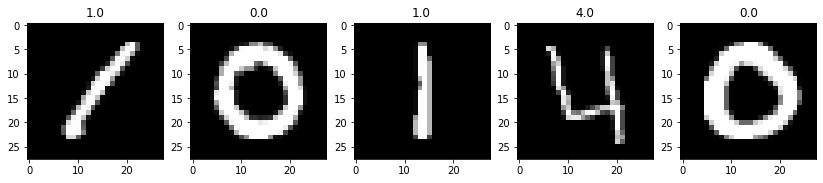

In [8]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [40]:
X = train.drop(labels=['label'], axis=1)
y = train['label']

In [42]:
# Создаю словарь для хранения характеристик моделей
val_acc_score = dict()
# Разделяю размеченный датасет на данные для обучения и валидации
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

Понижение размерности методом главных компонент

In [ ]:
# Создаю экземпляр класса PCA, сокращаю количество признаков с 784 до 100
pca = PCA(n_components=100)

# Обучаю на данных для обучения
pca.fit(X_train)

# Преобразую признаки данных для обучения путем понижения их размерности
pca_train = pca.transform(X_train)

# Преобразую признаки данных для валидации
pca_X_val_train = pca.transform(X_val)

KNN

In [45]:
knn = KNeighborsClassifier()
knn_model = knn.fit(pca_train, y_train)

In [67]:
y_pred_train_knn = knn_model.predict(pca_train)

In [68]:
acc_train_knn = sklearn.metrics.accuracy_score(y_train, y_pred_train_knn)
acc_train_knn

0.9801488095238096

In [69]:
y_pred_val_knn = knn_model.predict(pca_X_val_train)

In [70]:
acc_val_knn = sklearn.metrics.accuracy_score(y_val, y_pred_val_knn)
acc_val_knn

0.9694047619047619

Random forest

In [61]:
rf = RandomForestClassifier(n_estimators = 100, random_state=1)
rf_model = rf.fit(pca_train, y_train)

In [62]:
y_pred_rf = rf_model.predict(pca_train)

In [66]:
acc_train_rf = sklearn.metrics.accuracy_score(y_train, y_pred_rf)
acc_train_rf

1.0

In [72]:
y_pred_val_rf = rf_model.predict(pca_X_val_train)

In [73]:
acc_val_rf = sklearn.metrics.accuracy_score(y_val, y_pred_val_rf)
acc_val_rf

0.9411904761904762

SVM

In [74]:
svm = svm.SVC(kernel='poly')
svm_model = svm.fit(pca_train, y_train)

In [76]:
y_pred_svm = svm_model.predict(pca_train)
acc_train_svm = sklearn.metrics.accuracy_score(y_train, y_pred_svm)
acc_train_svm

0.9947619047619047

In [85]:
y_pred_val_svm = svm_model.predict(pca_X_val_train)
acc_val_svm = sklearn.metrics.accuracy_score(y_val, y_pred_val_svm)
acc_val_svm

0.9804761904761905

Logistic regression

In [80]:
lr_model = LogisticRegression()
lr_model.fit(pca_train, y_train)

LogisticRegression()

In [81]:
y_pred_lr = lr_model.predict(pca_train)
acc_train_lr = sklearn.metrics.accuracy_score(y_train, y_pred_lr)
acc_train_lr

0.919345238095238

In [83]:
y_pred_val_lr = lr_model.predict(pca_X_val_train)
acc_val_lr = sklearn.metrics.accuracy_score(y_val, y_pred_val_lr)
acc_val_lr

0.9104761904761904

In [87]:
m = ['KNN', 'Random forest', 'SVM', 'Logistic regression']

acc = [acc_val_knn, acc_val_rf, acc_val_svm, acc_val_lr] 

data = pd.DataFrame({'model#': m, 
                     'acc': acc
                    
                    }                                      
                   )
data

,model#,acc
0,KNN,0.969405
1,Random forest,0.941190
2,SVM,0.980476
3,Logistic regression,0.910476


Загрузка результатов на Kaggle

In [88]:
y_pred_competition = svm_model.predict(pca_X_val_train)

In [89]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_competition, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [90]:
!head submit.txt

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
